In [1]:
from simuPark.park import SalitrePark
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for i in range(4):
    park = SalitrePark(
        fn = fn,
        fastpass_pool_size=0.13,
    )

    park.start_day(max_entry_rate=95000/960, wait_time_update=5)


    for guest in park.guests:
        current_guest = []

        current_guest.append(guest.archetype)
        current_guest.append(guest.arrival_time)
        current_guest.append(guest.departure_time)
        current_guest.append(guest.departure_time - guest.arrival_time)
        current_guest.append(guest.max_wait)
        current_guest.append(guest.attractions_experienced)
        current_guest.append(guest.total_wait_time)
        if guest.attractions_experienced == 0:
            current_guest.append(0)
        else: 
            current_guest.append(guest.total_wait_time / guest.attractions_experienced)

        guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df.to_csv(r'./datasets/SFP.csv')



Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:18<00:00, 52.88it/s]

Generating Entry Events...


Entry Events Generated



100%|██████████| 960/960 [00:18<00:00, 51.30it/s]


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:18<00:00, 51.08it/s]


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:18<00:00, 53.06it/s]


39058
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


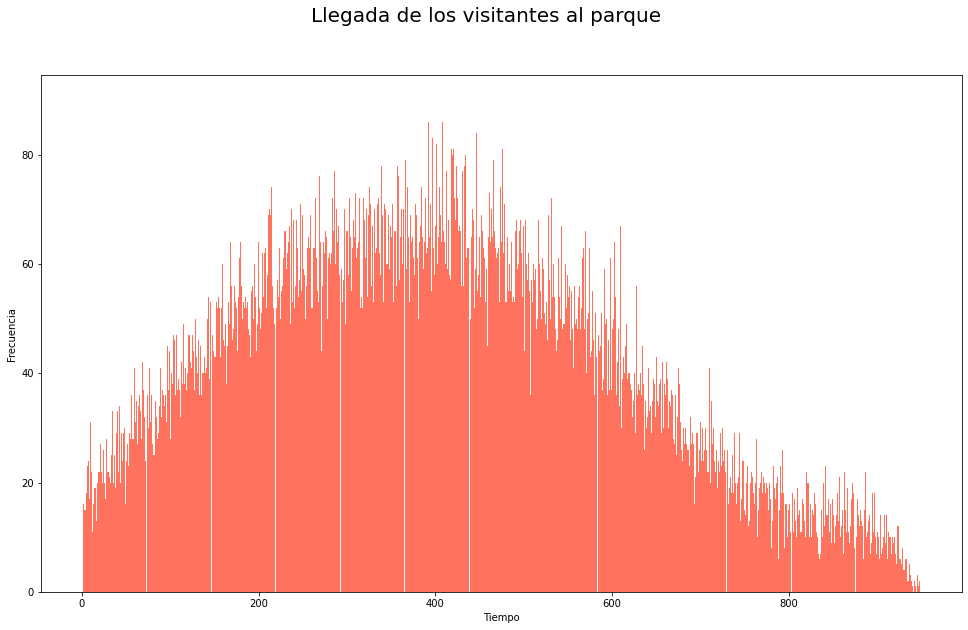

In [43]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [44]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'fastpass?',
    'fastpass_used',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.fastpass)
    current_guest.append(guest.fastpass_used)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
# guest_df.to_csv(r'./datasets/DFP.csv')
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,fastpass?,fastpass_used,total_wait_time,average_wait_time
0,Tourist,1,309,308,60,7,True,7,43,6.142857
1,Activity Enjoyer,1,69,68,10,0,False,0,0,0.000000
2,All Day Park,1,630,629,40,12,True,12,136,11.333333
3,Activity Enjoyer,1,160,159,10,1,False,0,5,5.000000
4,Average,1,244,243,50,6,True,6,29,4.833333
...,...,...,...,...,...,...,...,...,...,...
39053,Activity Enjoyer,946,960,14,10,0,True,0,0,0.000000
39054,Attraction Enjoyer,946,960,14,70,0,False,0,13,0.000000
39055,Relaxed Visitor,947,960,13,25,0,False,0,0,0.000000
39056,Attraction Enjoyer,948,960,12,70,0,False,0,11,0.000000


Atracciones experimentadas promedio: 3.5164370935531775
Atracciones experimentadas desviación estandar: 3.2896040626937584


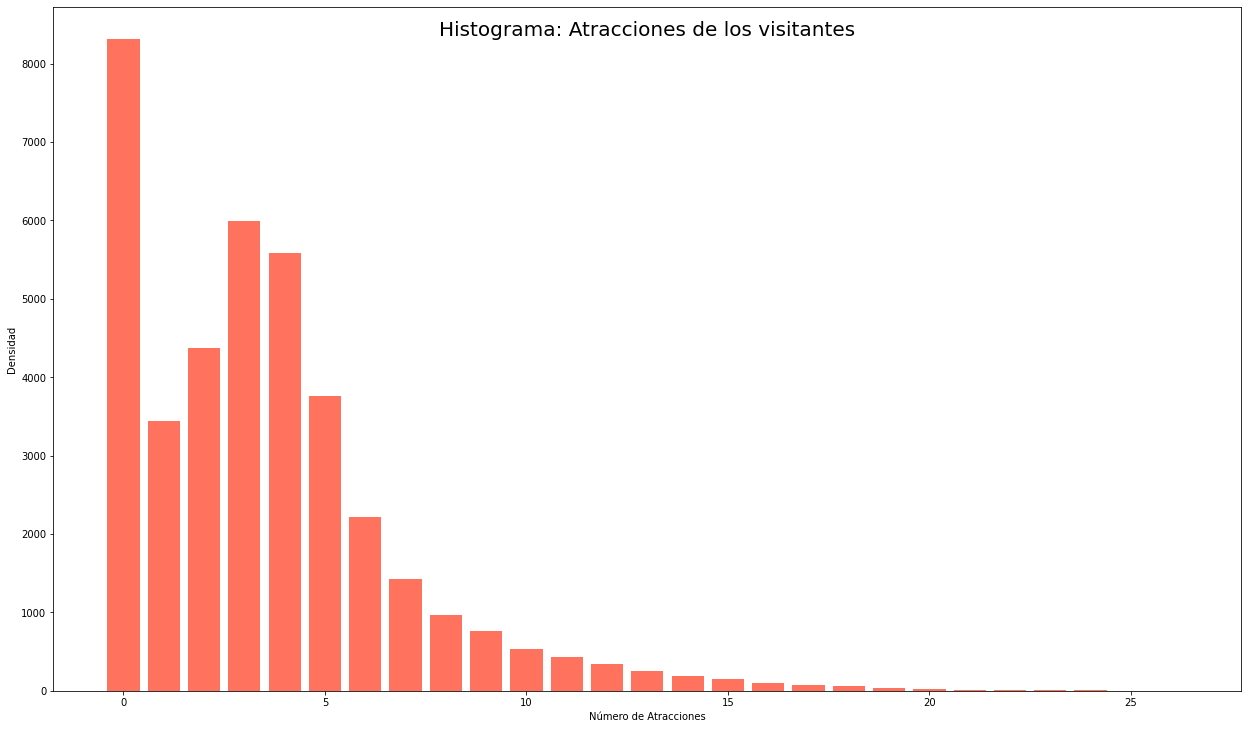

In [45]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

43.550949942333865
(43.2309751310727, 43.870924753595034)
30750
198.0


Text(0, 0.5, 'Densidad')

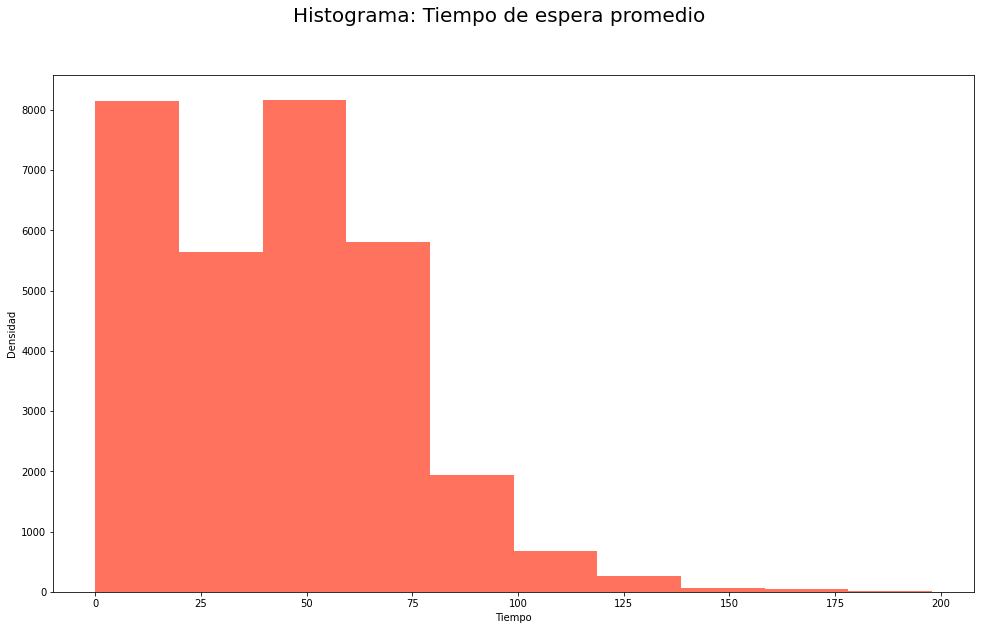

In [46]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)


print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime,  color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')

In [47]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,30
1,Expedition Everest,10
2,Flight of Passage,55
3,Kali River Rapids,10
4,Kilimanjaro Safaris,30
5,Na'vi River Journey,40
6,TriceraTop Spin,0


In [48]:
attr_alt_wait_time = [[attr.name, attr.alt_queue.top_wait_time] for attr in park.attractions]
attr_df_alt = pd.DataFrame(attr_alt_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df_alt

,Name,MaximunWaitTime
0,DINOSAUR,0
1,Expedition Everest,0
2,Flight of Passage,15
3,Kali River Rapids,0
4,Kilimanjaro Safaris,0
5,Na'vi River Journey,0
6,TriceraTop Spin,0


In [49]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()



id: 8930  arvTime: 227 things_done: ['Flight of Passage', 'Flight of Passage', 'Kilimanjaro Safaris', 'Kali River Rapids', "Na'vi River Journey", 'DINOSAUR', 'Flight of Passage', 'Kilimanjaro Safaris', 'Expedition Everest', 'Expedition Everest', 'Expedition Everest', 'Kilimanjaro Safaris', 'DINOSAUR', "Na'vi River Journey", 'Flight of Passage', 'Kilimanjaro Safaris', 'Kali River Rapids', 'DINOSAUR', "Na'vi River Journey", "Na'vi River Journey", 'Flight of Passage', 'Kali River Rapids', 'Expedition Everest', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids'] attrExp: 26
queues_joined: 26 total_wait_time: 304 archetype: All Day Park
fastpass? True


In [50]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()

park.attractions[0].queue.max_in_queue


id: 35921  arvTime: 724 things_done: ["Na'vi River Journey"] attrExp: 1
queues_joined: 2 total_wait_time: 198 archetype: Tourist
fastpass? False


1271

In [51]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

8308